In [27]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
import cv2


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking Text to Binary-->

In [30]:
name="MynameisToran"

In [31]:
print("The Original String is:- "+name)

The Original String is:- MynameisToran


In [32]:
res=''.join(format(ord(i),'b')for i in name)

In [33]:
print(res)

1001101111100111011101100001110110111001011101001111001110101001101111111001011000011101110


# Checking Binary to Text-->

In [34]:
def BinaryTointeger(binary):

    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return (decimal)

bin_data =res

print("The binary value is:", bin_data)


str_data =' '


for i in range(0, len(bin_data), 7):
    temp_data = int(bin_data[i:i + 7])
    decimal_data = BinaryTointeger(temp_data)
    str_data = str_data + chr(decimal_data)


print("The Binary value after string conversion is:",str_data)

The binary value is: 1001101111100111011101100001110110111001011101001111001110101001101111111001011000011101110
The Binary value after string conversion is:  MynameisToran


# Function to convert the input message to Binary..

In [35]:
def message2binary(message):
  if type(message) == str:
    result= ''.join([ format(ord(i), "08b") for i in message ])

  elif type(message) == bytes or type(message) == np.ndarray:
    result= [ format(i, "08b") for i in message ]

  elif type(message) == int or type(message) == np.uint8:
    result=format(message, "08b")

  else:
    raise TypeError("Input type is not supported")

  return result

# Here we are using 08b as we require 8 bit representation of binary digits.
# If we will be using only b then it will not add 0 to convert it into 8 bits and returns the binary converted value..


In [36]:
# message2binary("heloouserthisisoran")

In [37]:
# message2binary("mynameistoran")

In [38]:
# r,g,b=message2binary([50,35,155])

# Importing Image-->

In [39]:
from IPython.display import Image
import os

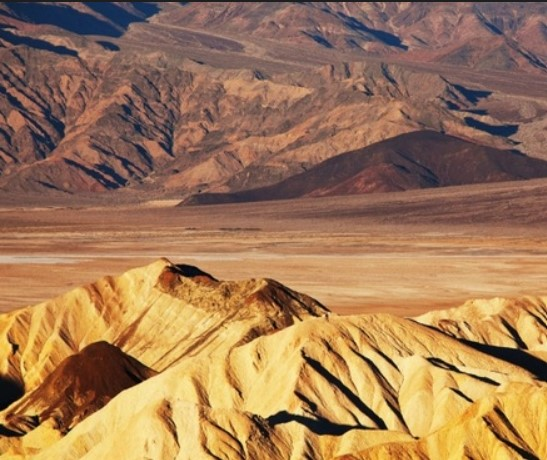

In [40]:
Image('/content/drive/MyDrive/Colab Notebooks/Steganography/images/download.jpg')

In [41]:
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Steganography/images/download.jpg")

In [42]:
#image

In [43]:
# for i in image:
#     for pixel in i:
#         print(pixel)

# How to overwrite the LSB bit of a binary number and converting it to decimal..-->

In [44]:
h='1000110'
int(h[:-1]+'1',2)

71

# [:-1] neglects the LSB bit then we can add a bit and by int(value,2) we will change it to new decimal value..

In [45]:
list1=[ ]

# ENCODER FUNCTION

In [46]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")
    if (len(data) == 0):
      raise ValueError('Data is empty')

    filename = input("Enter the name of the New Image after Encoding(with extension):")

    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8

    print("Maximum bytes to encode:", no_bytes)

    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")

    # Using the below as delimeter
    data +='*****'

    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)

    print("The Length of Binary data",data_len)

    data_index = 0

    for i in img:
        for pixel in i:

          r, g, b = message2binary(pixel)
         # print(r)
         # print(g)
         # print(b)
        #   print(pixel)
          if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
#               print("Original Binary",r)
              # print("The old pixel",pixel[0])
              pixel[0] = int(r[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Red Pixel
#               print("Changed binary",r[:-1] + data_binary[data_index])

              data_index += 1
              list1.append(pixel[0])

          if data_index < data_len:
             # hiding the data into LSB of Green Pixel
              pixel[1] = int(g[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Green Pixel
              data_index += 1
              list1.append(pixel[1])

          if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
              pixel[2] = int(b[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Blue pixel
              data_index += 1
              list1.append(pixel[2])

              # if data is encoded, just breaking out of the Loop
          if data_index >= data_len:
              break



    cv2.imwrite(filename,img)

    print("Encoded the data successfully and the image is successfully saved as ",filename)

# ENCODING THE DATA-->



In [47]:
encode_data(image)

Enter the data to be Encoded:MynameisToran
Enter the name of the New Image after Encoding(with extension):stegano_final.png
Maximum bytes to encode: 94357
010011010111100101101110011000010110110101100101011010010111001101010100011011110111001001100001011011100010101000101010001010100010101000101010
The Length of Binary data 144
Encoded the data successfully and the image is successfully saved as  stegano_final.png


# DECODER FUNCTION-->


In [48]:
def decode_data(img):

  binary_data = ""
  for i in img:
      for pixel in i:

        #   print(pixel)
          r, g, b = message2binary(pixel)
          binary_data += r[-1]  #Extracting Encoded data from the LSB bit of Red Pixel as we have stored in LSB bit of every pixel.
          binary_data += g[-1]  #Extracting Encoded data from the LSB bit of Green Pixel
          binary_data += b[-1]  #Extracting Encoded data from LSB bit of Blue Pixel

  # splitting by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]

  # Converting the bits to Characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "*****": #Checking if we have reached the delimeter which is "*****"
          break


  print("The Encoded data was :--",decoded_data[:-5])

# DECODING THE DATA-->


In [49]:
image1=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Steganography/images/stegano_final.png")

In [50]:
decode_data(image1)

The Encoded data was :--                                                                                                                                                                                                                                                                                                                                                                                                                          
ÌÏºMkÖ¨m2zºýÙmêïuò¢Ê^µá¸'xë¤Á¼s÷æ&*$Ø¾ýðÛZsMþb´é£àÌ¡y]Pö9ßT ««õ$®Mv¥qdëpÿ+¢m·Cv¤ÂH!dáXÎ!t~à¸×¤rRf~¬sÛø|ã¬8'ËæÍQáViVßø¬µ!N5	ßvt¯3P^'?G¶N(70$ü­x³bTôÒQÀí®9¶õ]^ÃiJcþ8nÆmsræpºÛiPB"íjà¬ñ£-ÄÐîIÆý¾GHÓ}ãÞÂ9è½zzÈ>}pÎàÎëgfD;mC³ïo©Üu JrÇd&lÆÛê³24þöìßh@¯ßÚ;¿]¸XõA)ø-nâZ}çÊÖþ¸VÑáÏ6R§±Õ;û å6¤oÿp*Ë Þ¨«¹'b9Wf@ã6Ý£hbc{ËY¬óÝi¹ÓÁýÌé?À×TþçÑÊYø§5ÙÙqõu;àkwd©¨«EüK"ü09ºDêZ¼úWÚ½ØtÜÅ°XfceDUdî+8Àû`ì¯Æ®>_5$NIßûå'°NÏ¡4Liã8gÑCÕG|ÿ/ýÔn
Þ¦	²M'<Ð^ÝE0Oð;2

# The Original Image


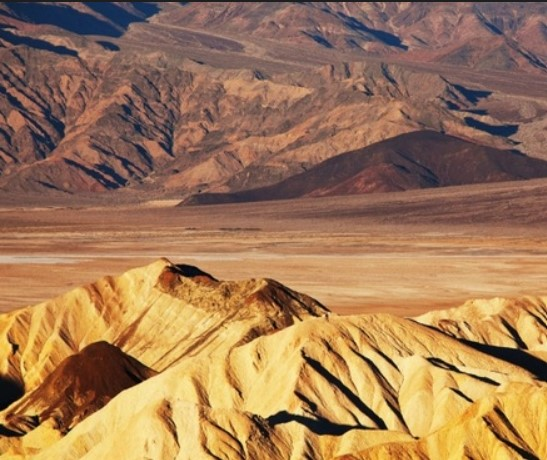

In [51]:
Image('/content/drive/MyDrive/Colab Notebooks/Steganography/images/download.jpg')


# The Image after Encoding Data


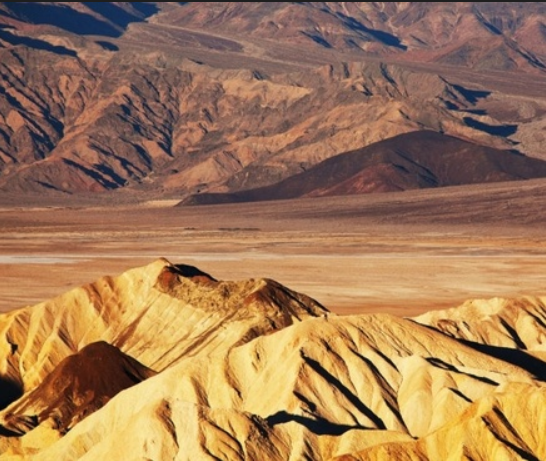

In [52]:
Image('/content/drive/MyDrive/Colab Notebooks/Steganography/images/stegano_final.png')

# Here we are seeing that after encoding the data also there is not much change in the image.Really we cannot find any difference between the original and the Steganographed image..